In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift, generate_non_linear_drift
from strategies import get_y1_and_zeta, DataDrivenImpulseControl, generate_reward_func, OptimalStrategy
plt.style.use(r"C:\Users\razz_\AppData\Local\Programs\Python\Python310\Lib\site-packages\matplotlib\mpl-data\stylelib\theme_bw.mplstyle")

In [2]:
b = generate_linear_drift(1/2)
g = generate_reward_func(1, 0.9)
y1, zeta = get_y1_and_zeta(g)

diffprocess = DiffusionProcess(b, sigma)
optStrat = OptimalStrategy(diffprocess, g)

true_a = diffprocess.get_a_of_invariant_density(zeta)
true_M1 = diffprocess.get_M1_of_xi(y1, zeta)
print(true_a)
print(true_M1)
print(optStrat.y_star)

0.2431077104309247
0.2716840775945488
0.49817258898670463


## Testing how different values of $a$ affects $\xi$

In [8]:
a_deltas = [0.000001, true_a/2, true_a, 2*true_a]

T = 100
data, t = diffprocess.EulerMaruymaMethod(T, 0.01, 0)

xiData = []

x_range_xi = np.linspace(y1, zeta, 200)
trueXi = diffprocess.xi(x_range_xi)

for a_val in a_deltas:
    dataStrat = DataDrivenImpulseControl(g, sigma, a=a_val, M1=true_M1)
    dataStrat.bandwidth = 1/np.sqrt(T)
    dataStrat.fit(data)
    xis = [dataStrat.xi_eval(v) for v in x_range_xi]
    xiData.append(xis)

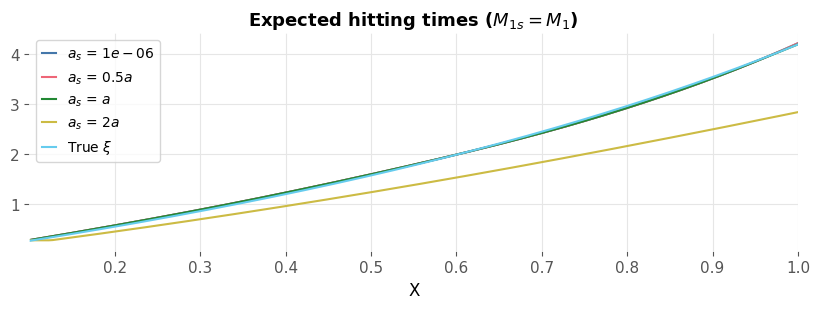

In [23]:
colors = ["#4477AA", "#EE6677", "#228833", "#CCBB44", "#AA3377"]
aText = ["$1e-06$", "$0.5a$", "$a$", "$2a$"]

fig, ax = plt.subplots(1,1,figsize=(8.3, 3.2))
for i, a_delta in enumerate(a_deltas):
    ax.plot(x_range_xi, xiData[i], color=colors[i], label=f"$a_s$ = {aText[i]}")
ax.plot(x_range_xi, trueXi, color="#66CCEE", label=r"True $\xi$")
ax.set_title("Expected hitting times ($M_{1s} = M_1$)", fontsize=13, fontweight="bold")
ax.set_xlabel("X")
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
#ax.axhline(y=true_M1, xmin=0, xmax=zeta, color="black", linestyle='--')
ax.set_xlim([y1, zeta])
ax.legend(loc="upper left", handlelength=1, handleheight=0.5)
#ax[1].set_xlabel("X", fontsize=12)
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.tight_layout()
#plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\aAndM1\ExpectedHittingTimesEstimated.pdf')
plt.show()

## Testing the effect of M1

In [56]:
M1_deltas = [0.000001, true_M1/2, true_M1, 2*true_M1]

T = 100
data, t = diffprocess.EulerMaruymaMethod(T, 0.01, 0)

xiData = []

x_range_xi = np.linspace(y1, zeta, 200)
trueXi = diffprocess.xi(x_range_xi)

for M1_val in M1_deltas:
    dataStrat = DataDrivenImpulseControl(g, sigma, M1=M1_val)
    print(dataStrat.M1)
    dataStrat.bandwidth = 1/np.sqrt(T)
    dataStrat.fit(data)
    xis = [dataStrat.xi_eval(v) for v in x_range_xi]
    xiData.append(xis)

1e-06
0.032131106173001994
0.06426221234600399
0.12852442469200798


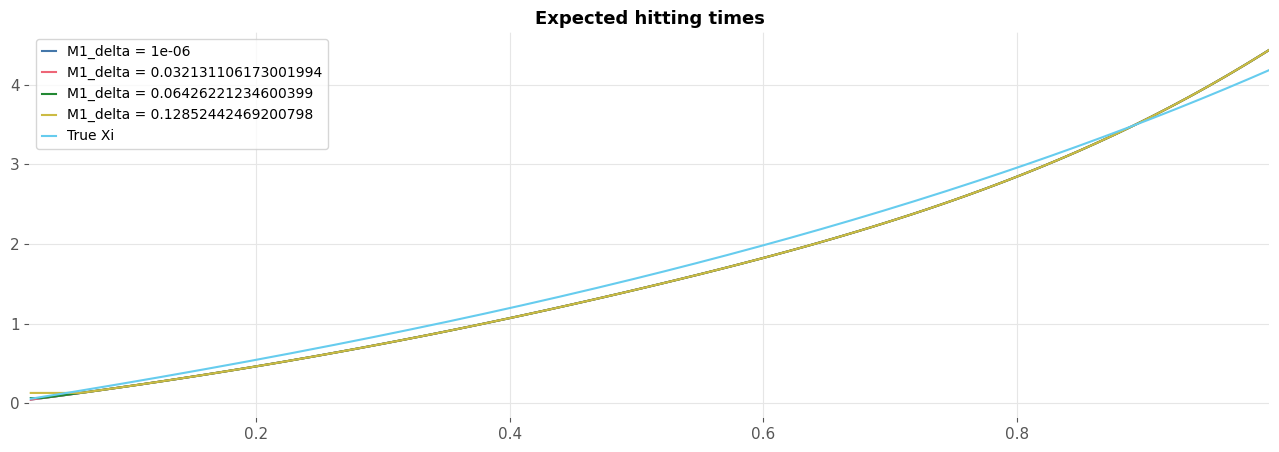

In [57]:
colors = ["#4477AA", "#EE6677", "#228833", "#CCBB44", "#AA3377"]

fig, ax = plt.subplots(1,1,figsize=(16, 5))
for i, M1_delta in enumerate(M1_deltas):
    ax.plot(x_range_xi, xiData[i], color=colors[i], label=f"M1_delta = {M1_deltas[i]}")
ax.plot(x_range_xi, trueXi, color="#66CCEE", label="True Xi")
ax.set_title("Expected hitting times", fontsize=13, fontweight="bold")
#ax[1].set_xlabel("X", fontsize=12)
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
#ax.axhline(y=true_M1, xmin=0, xmax=zeta, color="black", linestyle='--')
ax.set_xlim([y1, zeta])
ax.legend(loc="upper left", handlelength=1, handleheight=0.5)
ax.set_title("Expected hitting times", fontsize=13, fontweight="bold")
#ax[1].set_xlabel("X", fontsize=12)
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.show()